
# Handwritten digits

## Part 0

<center>
    <img src="https://github.com/Alice-Palladino/astrostatistics_bicocca_2024/blob/main/working/handwritten_digits.png?raw=true" alt="Handwritten digits" width="500">
</center>

1. First thing, grab a piece of paper and visually classify those digits. We'll see if you're better or worse than a computer!

My guess: \
8 9 8 4 2 6 9 \
4 9 4 0 6 1 7 \
6 9 5 4 4 8 4 \
0 5 1 4 7 9 5 \
2 1 0 8 3 9 6 \
1 1 2 0 5 4 4 \
9 6 2 6 1 0 0

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


2. Here is how you plot the images and the corresponding labels (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.

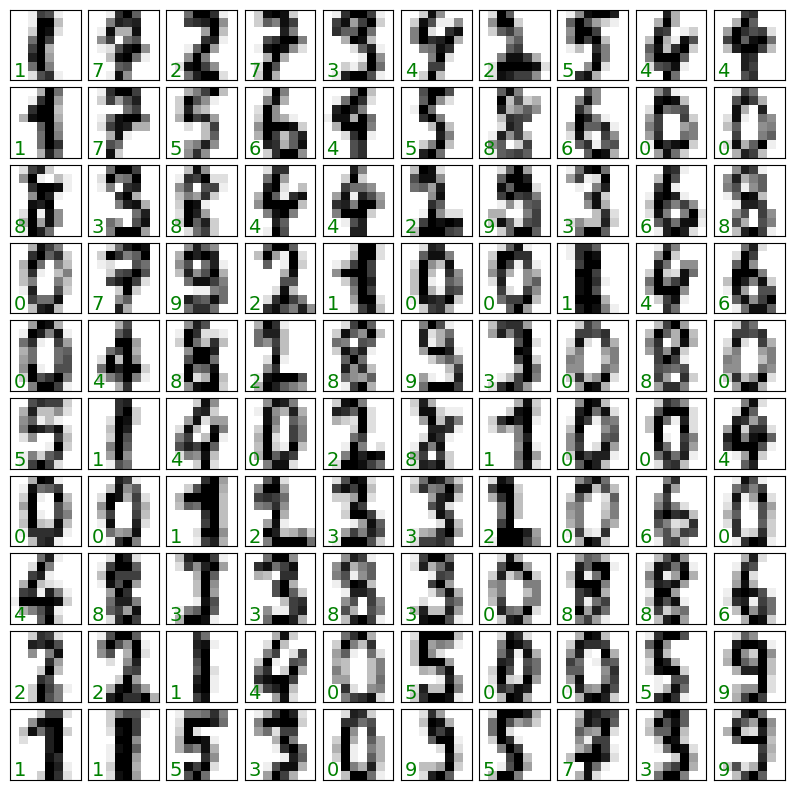

In [42]:
fig, axes = plt.subplots(10,10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

My new guess: \
8 9 8 1 8 6 9 \
1 9 4 0 6 1 7 \
6 9 5 4 4 8 4 \
0 5 6 4 7 9 5 \
2 1 0 8 3 9 6 \
1 1 2 0 5 4 4 \
9 6 2 6 1 0 0

Ok so the data is simply each pixel value within an $8 × 8$ grid. For this analysis, we don't care about the 
$2$-D nature of the image, we can just treat it as an $8 × 8=64$ dimensional array. So our data have $1797$ samples in 
$64$ dimensions.

Then each of the $1797$ images has a label.

In [8]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0



## Part 1: Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space.

3. Use the unsupervised dimensionality reduction technique called Isomap. Isomap is an embedding tecnique, which tries to understand if your 
 dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset. Do some plots to visualize your results.

In [9]:
embedding = Isomap(n_components = 2)
X = digits.data     # Shape: (1797, 64) -> 1797 images (arrays), 8x8=64 pixels (dimensions)
y = digits.target     # Real labels
X_tr = embedding.fit_transform(X)     # Shape: (1797, 2) 
print(X.shape)
print(X_tr.shape)

C:\Users\lilit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\lilit\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 64)
(1797, 2)


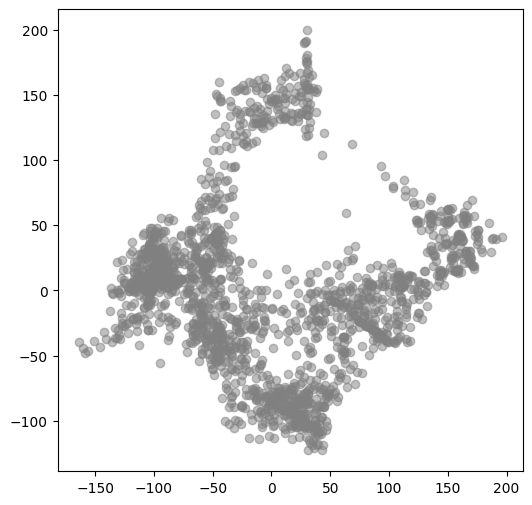

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(X_tr[:, 0], X_tr[:, 1], c = 'grey', alpha = 0.5)
plt.show()

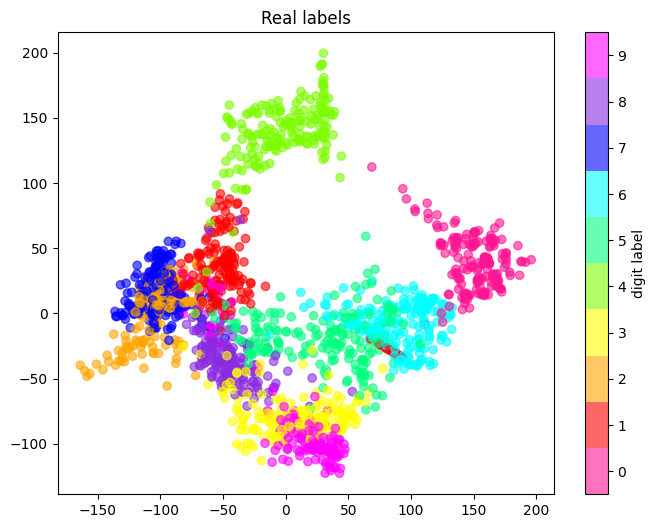

In [11]:
colors = ['deeppink', 'red', 'orange', 'yellow', 'lawngreen', 'springgreen', 'cyan', 'blue', 'blueviolet', 'magenta']
custom_cmap = ListedColormap(colors)

plt.figure(figsize=(8, 6))
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y, cmap = custom_cmap, alpha=0.6)
plt.title('Real labels')

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

plt.show()

From this graph we can say that:

* The 0 and 4 are well-isolated and thus recognizable (not surprising for 0, more surprising for 4: I had a hard time distinguishing 4 and 1);
* 3 and 9, 5 and 6, 2 and 7 are very similar to each other (not surprising);


## Part 2: Supervised Learning: Classification on Digits

Now we want to classify the dataset.

4. Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need sklearn.model_selection.train_test_split.

5. Use a simple Logistic Regression which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag solver='sag' (I found the default solver had a bug, at least when I tried).

6. Compute the accuracy (sklearn.metrics.accuracy_score) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7. The accuracy is a single number and doesn't tell us where we've gone wrong. Plot the confusion matrix as we did above. What are the digits that are more challenging to identify, does it make sense?

First of all, I want to know now my accuracy with the predictions before, so:

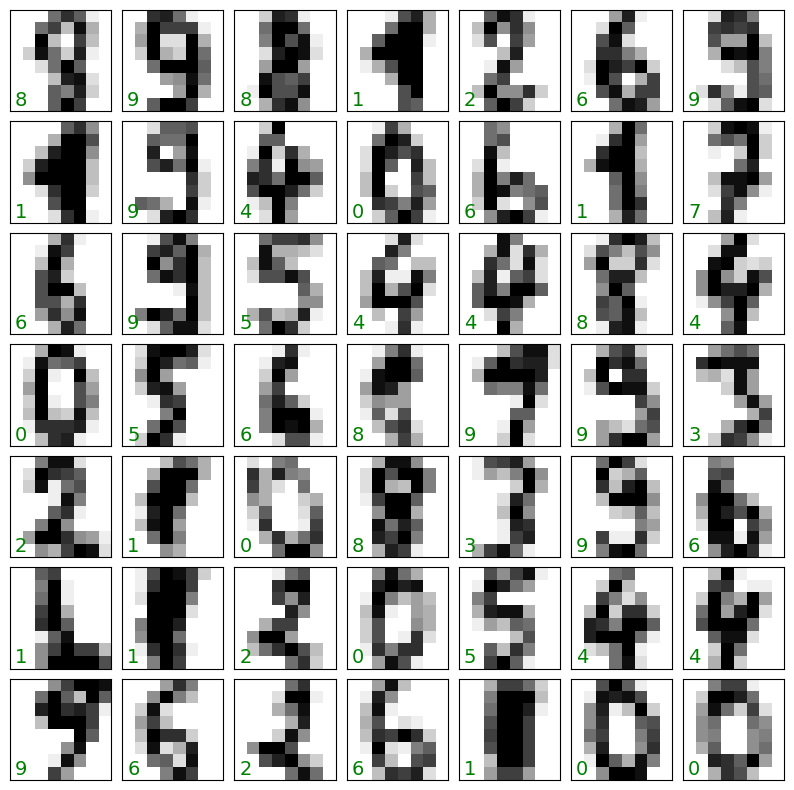

In [48]:
# Code brutally taken from the solutions
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(4321) #### This was the seed
mychoices = np.random.choice(digits.images.shape[0],49)
np.random.seed()

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

My first guess:\
8 9 8 $\textcolor{red}{\text{4}}$ 2 6 9 \
$\textcolor{red}{\text{4}}$ 9 4 0 6 1 7 \
6 9 5 4 4 8 4 \
0 5 $\textcolor{red}{\text{1 4 7}}$ 9 $\textcolor{red}{\text{5}}$ \
2 1 0 8 3 9 6 \
1 1 2 0 5 4 4 \
9 6 2 6 1 0 0 

Accuracy: $\sim88\%$

My "trained" guess: \
8 9 8 1 $\textcolor{red}{\text{8}}$ 6 9 \
1 9 4 0 6 1 7 \
6 9 5 4 4 8 4 \
0 5 6 $\textcolor{red}{\text{4 7}}$ 9 $\textcolor{red}{\text{5}}$ \
2 1 0 8 3 9 6 \
1 1 2 0 5 4 4 \
9 6 2 6 1 0 0 

Accuracy: $\sim92\%$

The most difficult digits for me to identify were 4 and 7, so I'm not surprised about my errors, though I expected worse results! Let's see what the Logistic Regression says about it:

In [54]:
'''
I want to make sure that this set doesn't end up in the training set. If I simply split the initial 1797 images 80%-20%, I get
1437 train images and 360 test ones. To obtain 1437 train images and 311 test ones (to which I'm manually adding the initial 
dataset later) I need to split the 1748 remaining images with train_size = 0.8225.
'''

# Initial dataset that I'm setting aside (49 images)
X_start = X[mychoices]
y_start = y[mychoices]

X_remaining = np.delete(X, mychoices, axis=0)
y_remaining = np.delete(y, mychoices, axis=0)
print(X_remaining.shape)

Xtrain, Xtest_partial, ytrain, ytest_partial = train_test_split(X_remaining, y_remaining, train_size=0.8225)
print(Xtrain.shape, Xtest_partial.shape)

Xtest = np.concatenate((Xtest_partial, X_start), axis=0)
ytest = np.concatenate((ytest_partial, y_start), axis=0)
print(Xtrain.shape, Xtest.shape)

(1748, 64)
(1437, 64) (311, 64)
(1437, 64) (360, 64)


In [55]:
LR = LogisticRegression(penalty='l2', max_iter=2000,solver='sag')
LR.fit(Xtrain, ytrain)

LogisticRegression(max_iter=2000, solver='sag')

In [62]:
# Let's see how accurate is the prediction on the train data and the test data.
ytrain_pred = LR.predict(Xtrain)
ytest_pred = LR.predict(Xtest)

print("Accuracy of the prediction on the train data: %.3f" % accuracy_score(ytrain, ytrain_pred))
print("Confusion matrix for the train data:")
print(confusion_matrix(ytrain, ytrain_pred))     # Rows: actual values - Columns: predicted values

print("\nAccuracy of the prediction on the test data: %.3f" % accuracy_score(ytest, ytest_pred))
print("Confusion matrix for the test data:")
print(confusion_matrix(ytest, ytest_pred))

Accuracy of the prediction on the train data: 1.000
Confusion matrix for the train data:
[[144   0   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0]
 [  0   0   0   0 142   0   0   0   0   0]
 [  0   0   0   0   0 136   0   0   0   0]
 [  0   0   0   0   0   0 150   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0]
 [  0   0   0   0   0   0   0   0 139   0]
 [  0   0   0   0   0   0   0   0   0 140]]

Accuracy of the prediction on the test data: 0.953
Confusion matrix for the test data:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  1]
 [ 0  0 33  2  0  0  0  0  0  0]
 [ 0  0  0 41  0  1  0  0  0  1]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  1  1  0  1 41  1  0  0  1]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  1  0  0  0 29  0  0]
 [ 0  1  0  0  0  1  0  0 32  1]
 [ 0  0  0  0  1  1  0  0  1 37]]


According to this confusion matrix, the zeros have always been identified correctly (as suggested by the Isomap before). The most difficult numbers to identify have been $6$ (mislabeled 5 times), $8$ and $9$ (mislabeled 3 times).

Appliyng it specifically at the starting dataset:

Accuracy of the prediction on the starting set data: 0.959
Confusion matrix for the starting set data:
[[6 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 1 7]]


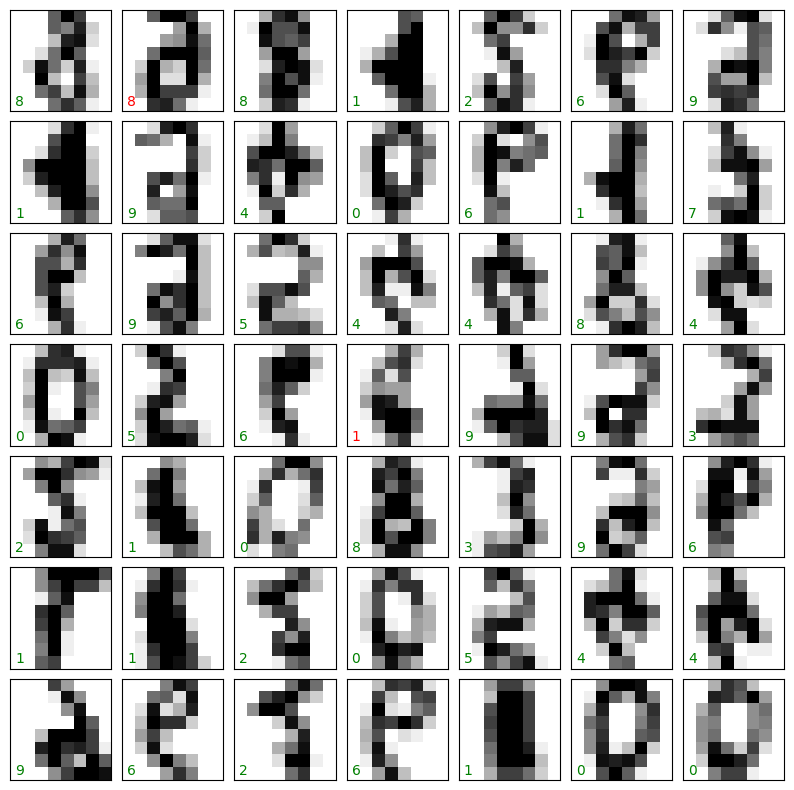

In [63]:
y_start_pred = LR.predict(X_start)

print("Accuracy of the prediction on the starting set data: %.3f" % accuracy_score(y_start, y_start_pred))
print("Confusion matrix for the starting set data:")
print(confusion_matrix(y_start, y_start_pred)) 

fig, axes = plt.subplots(7, 7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(np.flipud(X_start[i].reshape(8, 8)), cmap='binary')
    ax.text(0.05, 0.05, str(y_start_pred[i]), transform=ax.transAxes, 
            color='green' if (y_start[i] == y_start_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

So, the first error is a $9$ mislabeled as an $8$, and the second one is an $8$ mislabeled as a $1$.